# Clustering: k-Medoids

In this lab tasks we implement k-Medoids algorithm.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

We start with generating synthetic dataset consisting of four clusters.

In [2]:
N = 100

#Generate dataset
np.random.seed(844)
clust1 = np.random.normal(5, 2, (N,2))
clust2 = np.random.normal(15, 2, (N,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], N)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], N)
dataset = np.concatenate((clust1, clust2, clust3, clust4))

#Create an array that stores cluster IDs of every object in our dataset
#We will use the index of a medoid as a cluster ID
clusters = np.zeros((len(dataset),1))

In [3]:
def cluster_plots(dataset, medoidInd=[], colours = 'gray', title = 'Dataset'):
    fig,ax = plt.subplots()
    fig.set_size_inches(12, 12)
    ax.set_title(title,fontsize=14)
    ax.set_xlim(min(dataset[:,0]), max(dataset[:,0]))
    ax.set_ylim(min(dataset[:,1]), max(dataset[:,1]))
    ax.scatter(dataset[:, 0], dataset[:, 1],s=8,lw=1,c= colours)

    #Plot medoids if they are given
    if len(medoidInd) > 0:
        ax.scatter(dataset[medoidInd, 0], dataset[medoidInd, 1],s=8,lw=6,c='red')
    fig.tight_layout()
    plt.show()

Let's plot our dataset

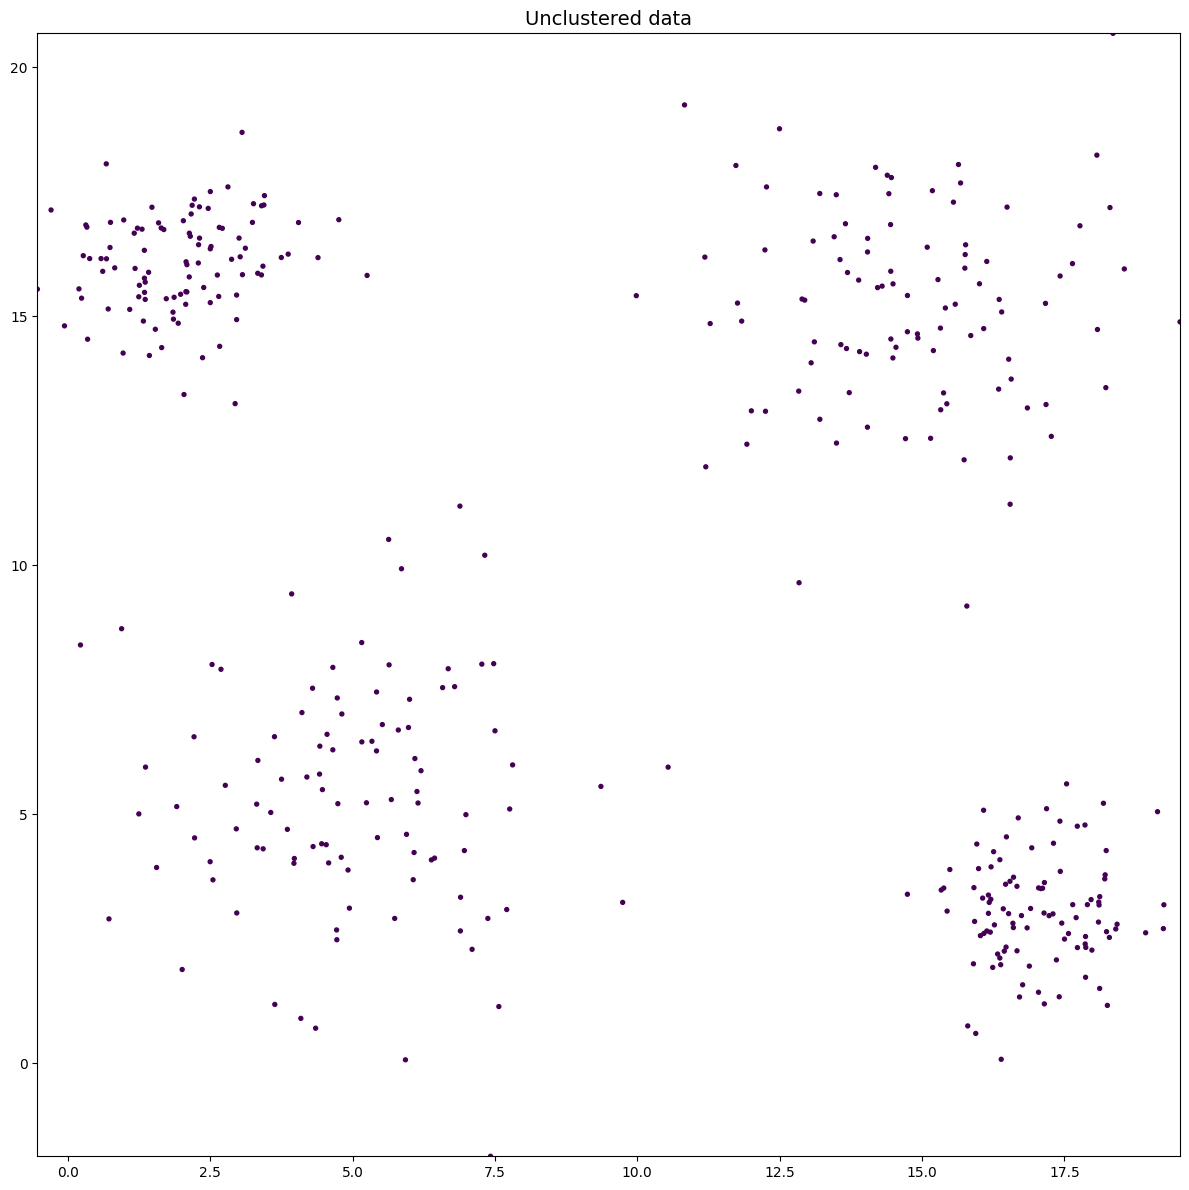

In [4]:
cluster_plots(dataset, colours=clusters, title='Unclustered data')

## Exercise 1

Implement k-medoids algorithm. Use the Euclidean distance as the dissimilarity measure.

In [5]:
def kmedoids(dataset, num_points, medoids, cluster_assignments, num_clusters):
    for i in range(num_points):
        distances = [np.linalg.norm(dataset[i] - dataset[medoid]) for medoid in medoids]
        cluster_assignments[i] = np.argmin(distances)
    
    min_total_distance = 0
    for cluster_idx in range(num_clusters):
        cluster_points = dataset[cluster_assignments == cluster_idx]
        
        if len(cluster_points) > 0:
            new_medoid = medoids[cluster_idx]
            min_distance = float('inf')
            
            for j in range(len(cluster_points)):
                total_distance = sum(np.linalg.norm(cluster_points[j] - point) for point in cluster_points)
                
                if total_distance < min_distance:
                    min_distance = total_distance
                    new_medoid = np.where((dataset == cluster_points[j]).all(axis=1))[0][0]
            
            medoids[cluster_idx] = new_medoid
            min_total_distance += min_distance
    
    return min_total_distance

## Exercise 2

1. Apply the implemented k-medoids algorithm to the generated dataset with the parameter k=4.
2. For every iteration of the algorithm  
    - output the current value of the objective function
    - output the indices of the current medoid objects
    - plot the clustering together with medoids

Iteration 1:
Objective function value: 1015.9842195886821
Medoid indices: [381  99 132 241]


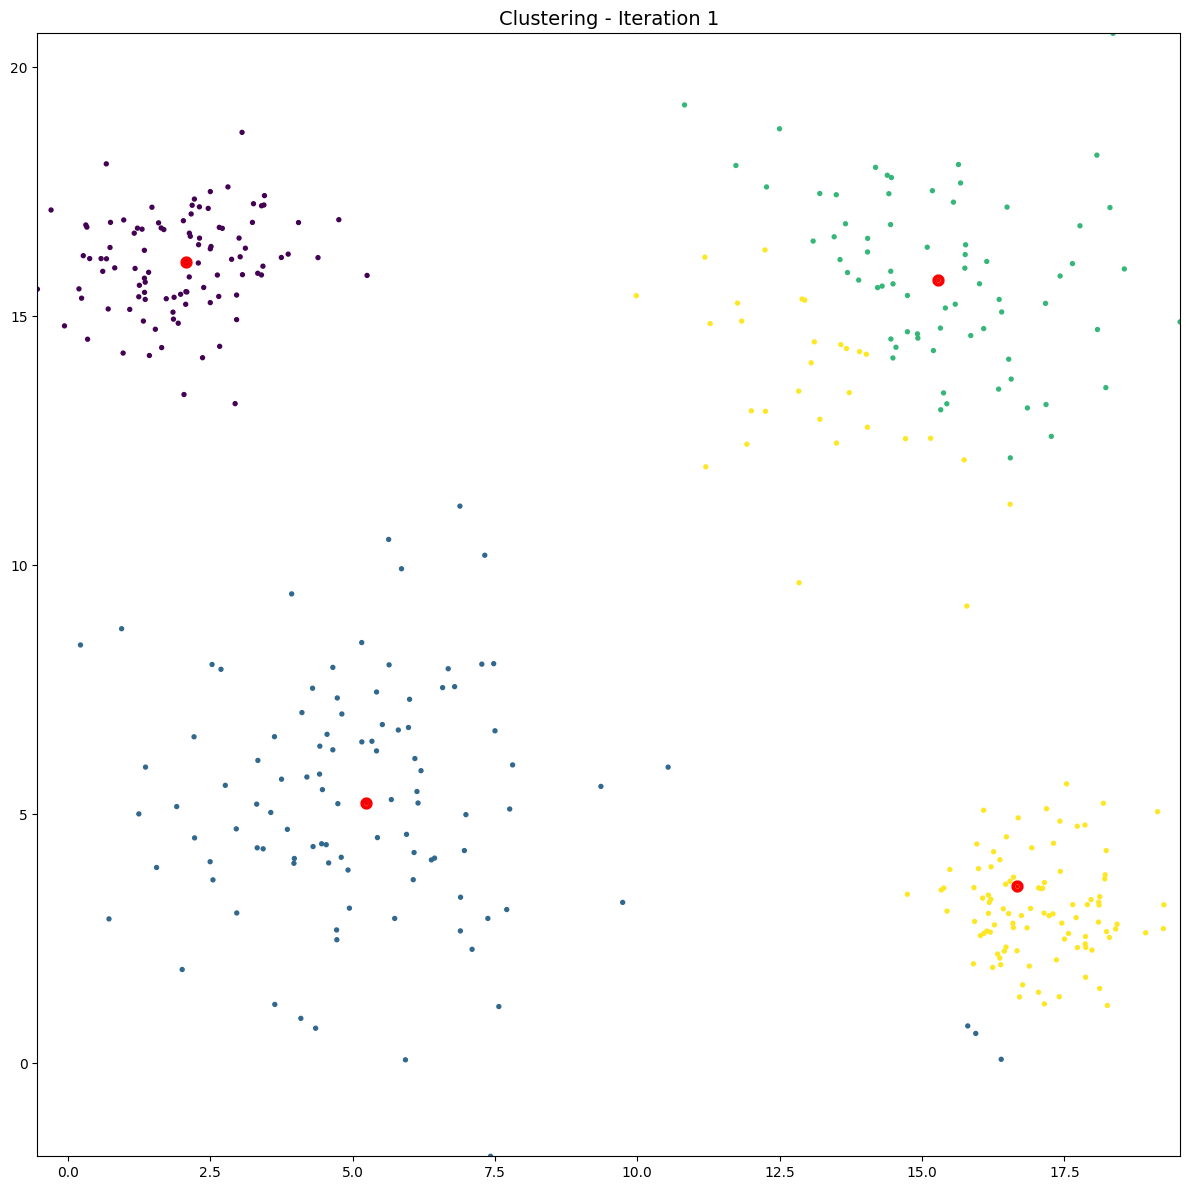

Iteration 2:
Objective function value: 764.0825931881247
Medoid indices: [381  37 138 290]


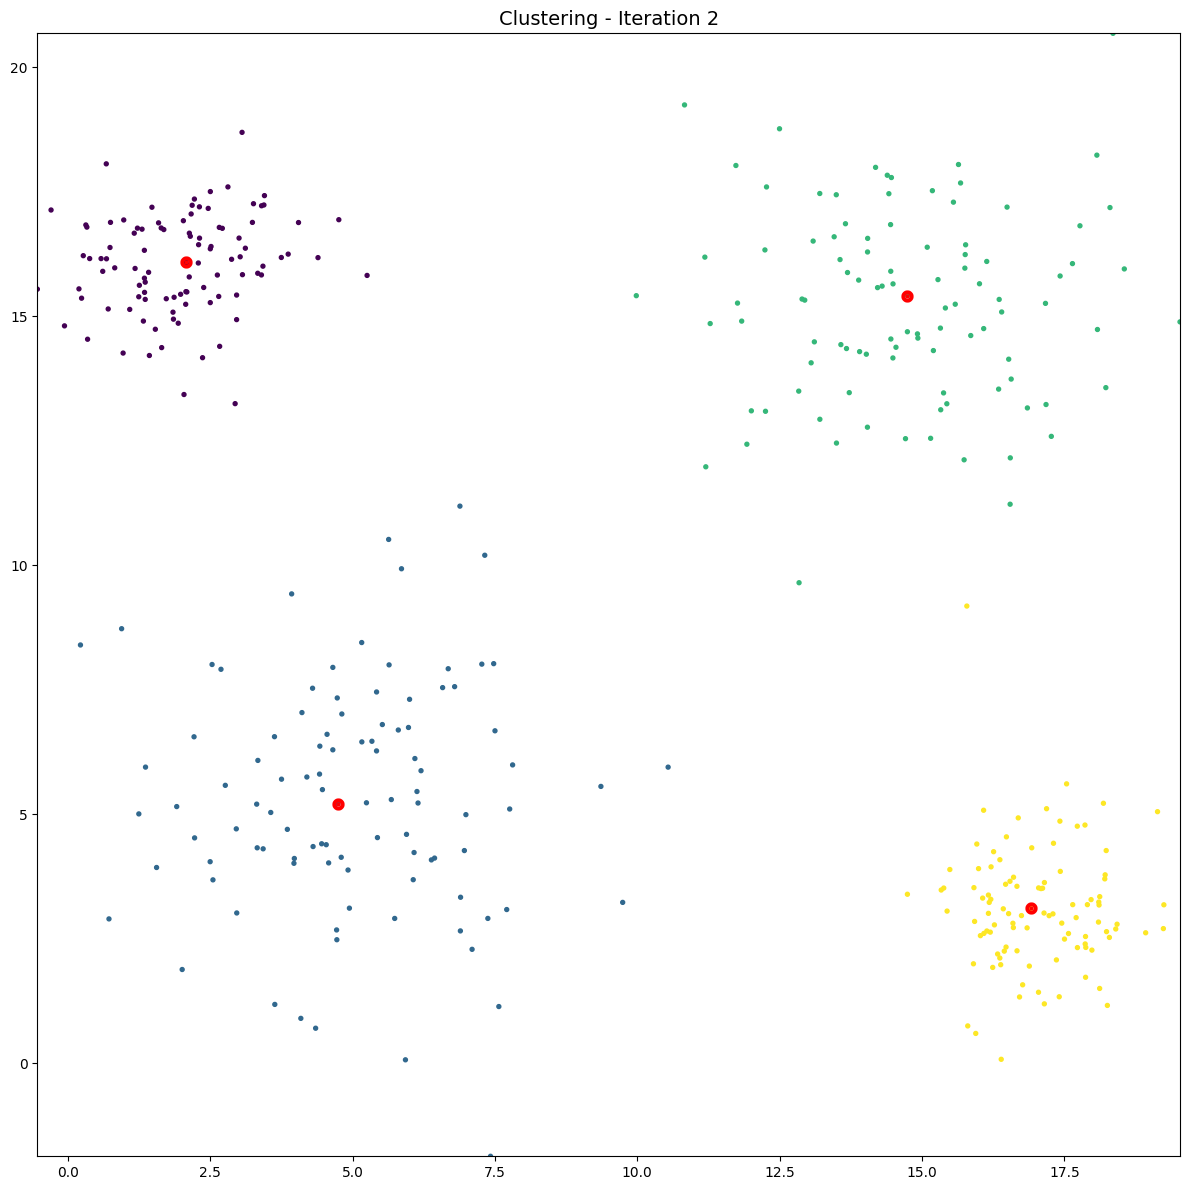

Iteration 3:
Objective function value: 764.0825931881247
Medoid indices: [381  37 138 290]


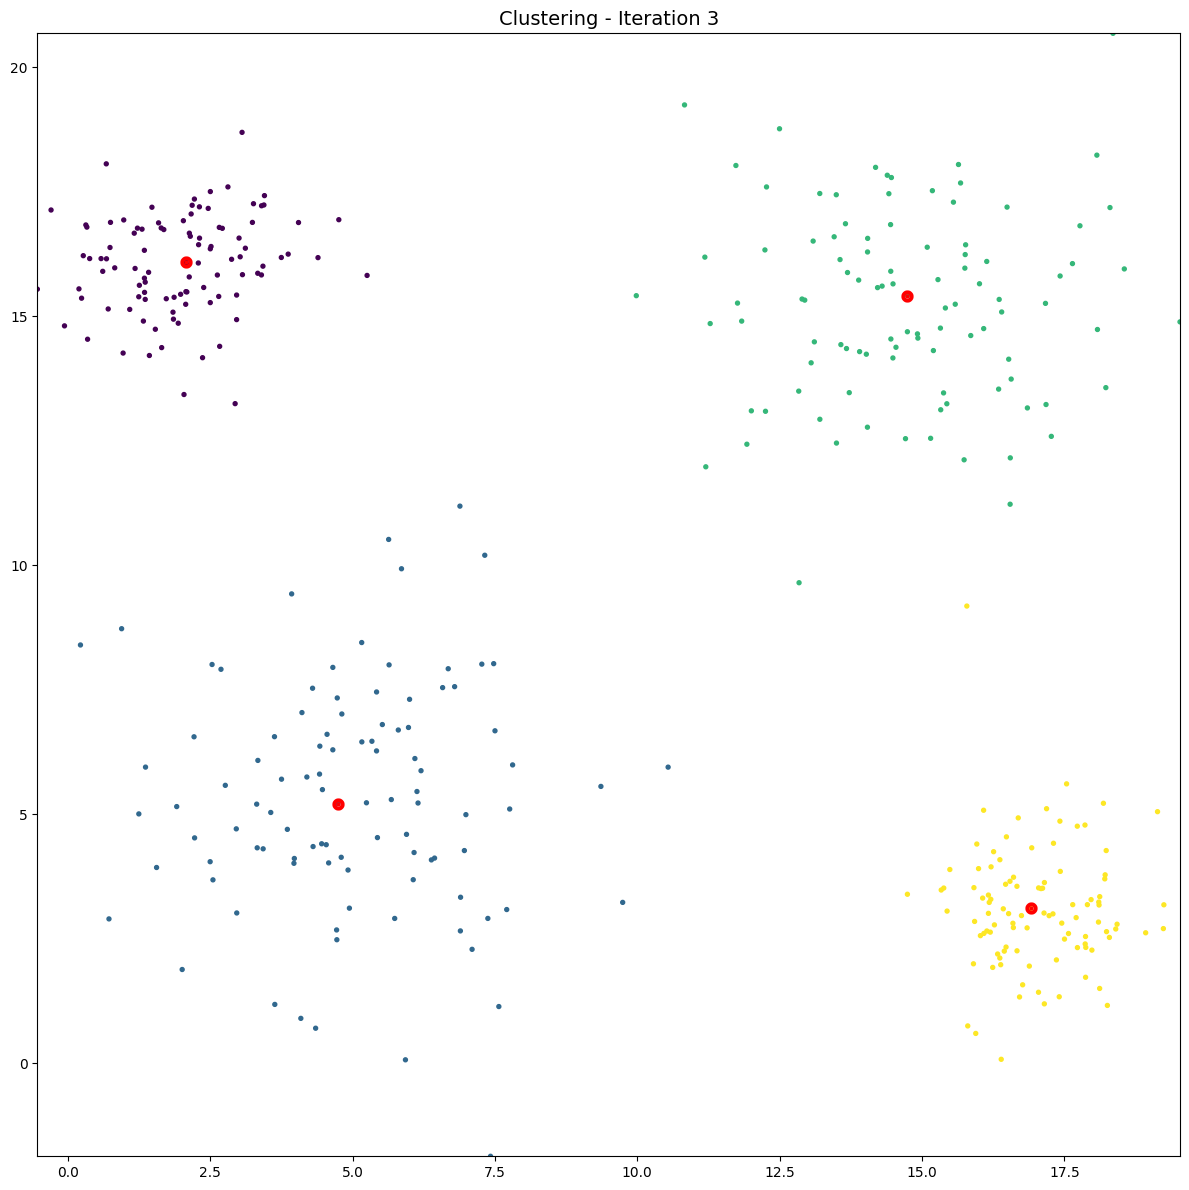

Converged, stopping iterations.


In [6]:
clusters = np.zeros(len(dataset), dtype=int)
k = 4
max_iter = 100

n = dataset.shape[0]
medoids = np.random.choice(n, k, replace=False)

for iteration in range(max_iter):
    prev_medoids = medoids.copy()
    obj_fn = kmedoids(dataset, n, medoids, clusters, k)
    
    print(f"Iteration {iteration+1}:")
    print(f"Objective function value: {obj_fn}")
    print(f"Medoid indices: {medoids}")
    
    cluster_plots(dataset, medoids, colours=clusters, title=f"Clustering - Iteration {iteration+1}")
    
    if np.array_equal(medoids, prev_medoids):
        print("Converged, stopping iterations.")
        break